In [1]:
# Example showing how to query STAC


from pprint import pprint

from pystac.client import Client
import rioxarray as rxr
import matplotlib.pyplot as plt

In [2]:
catalog = Client.open('https://nationaldataplatform.org/stac')

In [3]:
# get names of all NASA WERK collections
for collection in catalog.get_collections():
    if 'nasa-werk' in collection.id:
        print(collection.id)

nasa-werk-dem-ca-lapostwildfire-eaton-c25
nasa-werk-dem-ca-lapostwildfire-palisades-c25
nasa-werk-dem-ca-losangeles-1-b23
nasa-werk-dem-ca-nocal-wildfires-campfire-2018
nasa-werk-dem-ca-sanfrancisco-1-b23
nasa-werk-dem-ca-sierranevada-7-2022
nasa-werk-dem-statewide-10m
nasa-werk-dem-statewide-10m-canopy-percentiles
nasa-werk-dem-statewide-30m
nasa-werk-dem-statewide-30m-canopy-percentiles


In [4]:
# search for 1km x 1km tiles in an area of interest

bbox = [-118.53175951666208, 34.05049188327095, -118.5251304883327, 34.055870457160765]

results = catalog.search(collections=['nasa-werk-dem-ca-losangeles-1-b23'],
                         bbox=bbox)

In [5]:
for item in results.items():
    print(item.id)

usgs_lpc_ca_losangeles_b23_11slt035900376900_topographic_cog_1m
usgs_lpc_ca_losangeles_b23_11slt035900376800_topographic_cog_1m
usgs_lpc_ca_losangeles_b23_11slt035800376900_topographic_cog_1m
usgs_lpc_ca_losangeles_b23_11slt035800376800_topographic_cog_1m


In [6]:
# get the bands for the first item

item = list(results.items())[0]
pprint(item.properties['eo:bands'])

[{'name': 'Digital Terrain Model'},
 {'name': 'Digital Surface Model'},
 {'name': 'Canopy Height Model'},
 {'name': 'Slope'},
 {'name': 'Aspect'}]


In [7]:
# show the URL for the data
item.assets

{'data': <Asset href=https://scil-data.sdsc.edu/data/nasa-werk/CA_LosAngeles_1_B23/USGS_LPC_CA_LosAngeles_B23_11SLT035900376900_topographic_cog_1m.tif>}

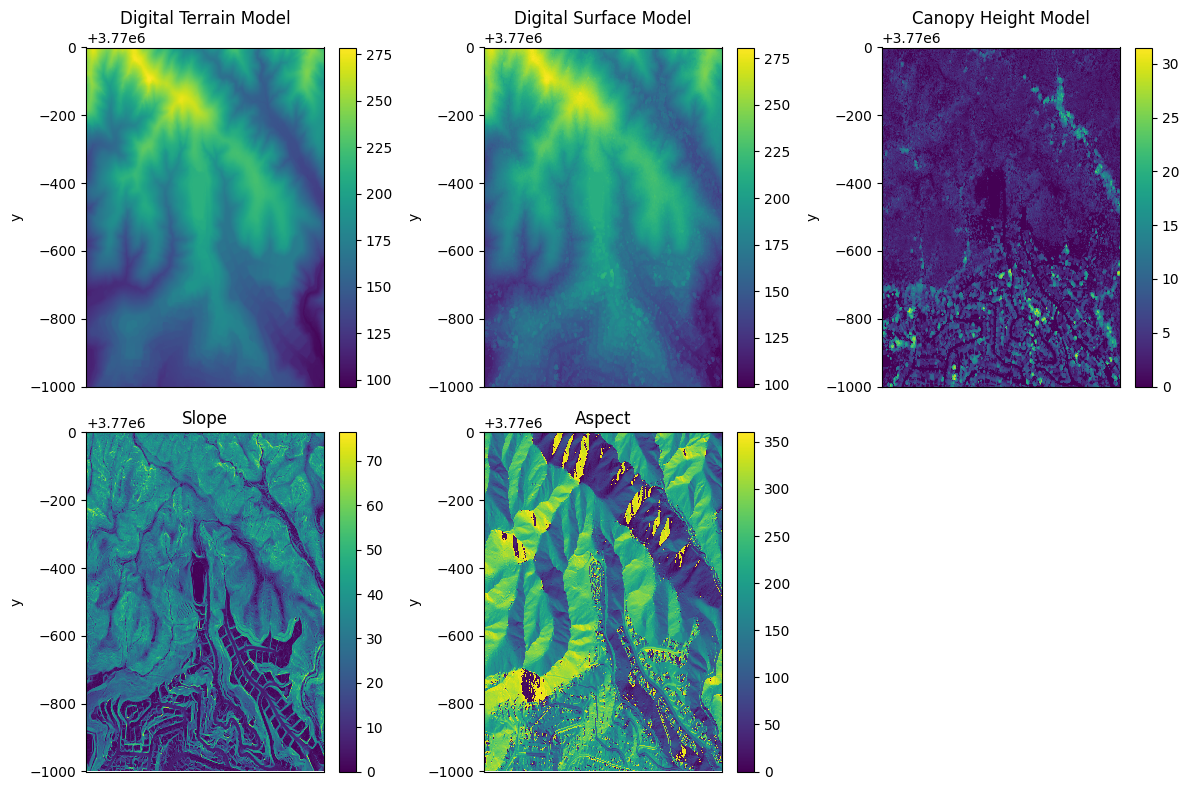

In [8]:
# open the geotiff and plot all 5 bands
da = rxr.open_rasterio(item.assets['data'].href, masked=True)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i in range(5):
    da.sel(band=i+1).plot(ax=axes[i], cmap="viridis")
    axes[i].set_title(f"{item.properties['eo:bands'][i]['name']}")

    # remove x-axis labels
    axes[i].set_xlabel("")    
    axes[i].set_xticks([])   
    
axes[5].axis("off")

plt.tight_layout()
plt.show()